In [44]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

In [45]:
x,y=make_classification(n_samples=10000,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=60)
X_train,X_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42)
print(len(X_train))

7500


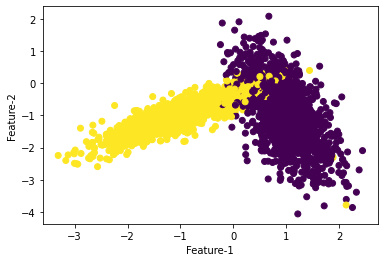

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")
plt.show()

In [47]:

def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.xlabel("Feature-1")
    plt.ylabel("Feature-2")
    plt.show()

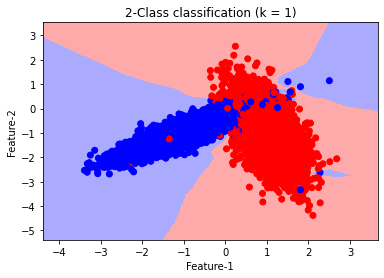

In [48]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)


## GridSearch CV

Grid Search method is used for tuning hyperparameter to get optimal values of hyperparameter which give higher accuracy on Cross validation Dataset

In Gridsearch we find optimal hyperparameter from all the possible combination of hyperparameters.

### Implementing Grid Search CV without using scikit learn grid search.

In [49]:
from sklearn.metrics import accuracy_score

def randomly_select_60_percent_indices_in_range_from_1_to_len(x_train):
    return random.sample(range(0, len(x_train)), int(0.6*len(x_train)))

In [50]:
def GridSearch(x_train,y_train,classifier,params,folds):
    trainscores=[]
    testscores=[]
    for k in tqdm(params['n_neighbors']):
        trainscores_folds=[]
        testscores_folds=[]
        for j in range(0,folds):
            train_indices=randomly_select_60_percent_indices_in_range_from_1_to_len(x_train)
            test_indices=list(set(list(range(1, len(x_train)))) - set(train_indices))
            X_train=x_train[train_indices]
            Y_train=y_train[train_indices]
            X_test=x_train[test_indices]
            Y_test=y_train[test_indices]

            classifier.n_neighbors=k
            classifier.fit(X_train,Y_train)
            Y_predicted=classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test,Y_predicted))
            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores


100%|██████████| 11/11 [00:07<00:00,  1.47it/s]


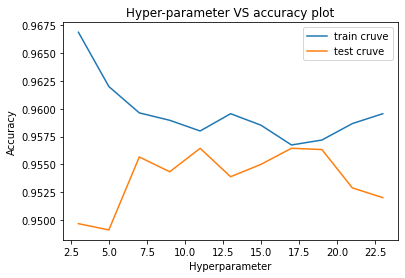

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23]}
folds = 3

trainscores,testscores = GridSearch(X_train, y_train, neigh, params, folds)
 

plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.xlabel("Hyperparameter")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## RandomSearch CV

Random Search method is used for tuning hyperparameter to get optimal values of hyperparameter which give higher accuracy on Cross validation Dataset

In RandomSearch we find optimal hyperparameter from the random values in fixed rangecombination.

### Custom implementation of RandomSearch Cv

In [52]:

def RandomSearch(x_train,y_train,classifier,params_range,folds):
    trainscores=[]
    testscores=[]
    params=np.random.randint(low=params_range[0],high=params_range[1],size=10)
    params.sort()
    for k in tqdm(params):
        trainscores_folds=[]
        testscores_folds=[]
        c=int((1/folds)*len(x_train))
        for i in range(0,len(x_train),c):
            test_indices=[i for i in range(i,i+c)]
            train_indices=list(set(list(range(0, len(x_train)))) - set(test_indices))
            X_train=x_train[train_indices]
            Y_train=y_train[train_indices]
            X_test=x_train[test_indices]
            Y_test=y_train[test_indices]

            classifier.n_neighbors=k
            classifier.fit(X_train,Y_train)
            Y_predicted=classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test,Y_predicted))
            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores,params

100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


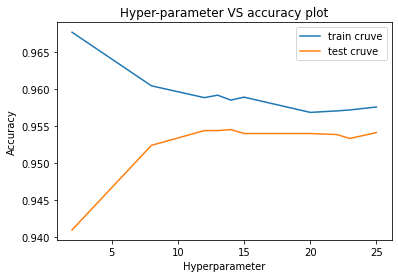

[ 2  8 12 13 14 15 20 22 23 25]


In [53]:
import numpy as np

neigh = KNeighborsClassifier()

params = (1,30)
folds = 3

trainscores,testscores,params = RandomSearch(X_train, y_train, neigh, params, folds)
 

plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.xlabel("Hyperparameter")
plt.ylabel("Accuracy")
plt.show()
print(params)

In [54]:
m=[]
for i in range(len(params)):
    m.append(trainscores[i]-testscores[i])

m

[0.026800000000000046,
 0.008066666666666777,
 0.004466666666666619,
 0.0048000000000000265,
 0.004000000000000115,
 0.004933333333333345,
 0.002866666666666573,
 0.0031999999999998696,
 0.003866666666666685,
 0.003466666666666507]

In [55]:
optimal_k=params[m.index(min(m))]
print("optimal value of k: ",optimal_k)

optimal value of k:  20


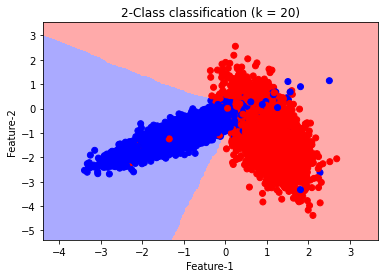

In [56]:
neigh = KNeighborsClassifier(n_neighbors = optimal_k)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)